## Sentiment Analysis of Jumia Reviews

Product reviews are evaluations or opinions shared by consumers who have purchased and used a specific product or service. These reviews are typically written on online platforms such as e-commerce websites, social media, or review websites.

In this project, you will apply your knowledge of sentiment analysis to analyze the sentiments expressed in product reviews by Jumia customers. You will work together as a group to preprocess the text data, build a sentiment analysis model, and interpret the results.




In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string 
import re
import matplotlib.pyplot as plt

%matplotlib inline


**Question 1:** Load the product reviews dataset into a variable called `customer_review_df`. Next, write a function called `check_data` to check if the data has been loaded successfully.

**Question 1.1:** Explore the distribution of sentiment labels in the dataset.

**Question 1.2** Engineer a new feature called `Sentiment` from the _Rating_ column. This takes the valuesand 1 for  -1, 0, `negative`, `neutral`, and `positive`.
- Reviews with Rating > 3 is positive
- Reviews with Rating = 3 is neutral
- Reviews with Rating < 3 is negative

In [6]:
# load the customer retention dataset
customer_review_df = pd.read_csv('sentiment-analysis-jumia-reviews.csv')

# write a function called `check_data` to check data loading is successful
# def check_data(): 
#     # Check if the dataframe is empty
#     if customer_review_df.empty:
#         return True  # Return True if the dataframe is empty
#     else:
#         return False   # Return False if the dataframe is not empty


# # Call the check_data function
# result = check_data()
# print(result)


# write a function called `check_data` to check data loading is successful
def check_data():
    if customer_review_df is not None and not customer_review_df.empty:
        print("Data loading successful.")
        print(f"Number of rows: {customer_review_df.shape[0]}, Number of columns: {customer_review_df.shape[1]}")
      
    else:
        print("Data loading failed.")

# Call the function to check data loading
check_data()

# Define a function to convert ratings to sentiments
def convert_to_sentiment(rating):
    if rating > 3:
        return 1  # Positive
    elif rating == 3:
        return 0  # Neutral
    else:
        return -1  # Negative

# Apply the function to create a 'Sentiment' column
customer_review_df['Sentiment'] = customer_review_df['Rating'].apply(convert_to_sentiment)


# Explore the distribution of sentiment labels in the dataset
sentiment_distribution = customer_review_df['Sentiment'].value_counts()
print("\nDistribution of Sentiment Labels:")



Data loading successful.
Number of rows: 100, Number of columns: 3

Distribution of Sentiment Labels:


In [7]:
print(sentiment_distribution)
# Check the first few rows
customer_review_df.head()

Sentiment
 1    76
 0    14
-1    10
Name: count, dtype: int64


,Rating,Title,Review,Sentiment
0,3,I like it,"The neck need to be adjusted, it's too big",0
1,1,not happy with product,You people should improve in the item's you pe...,-1
2,5,good,Well ok,1
3,4,Good,Was Fine,1
4,4,quality,Quality is very ok with size,1


**Question 2:** Preprocess the text data by completing the following:
- Convert the reviews to lowercase and remove punctuation. 
- Tokenize the text data to split it into individual words or tokens.

**Note**: Assign your final preprocessed dataset to a variable called `processed_customer_review_df`. Failure to do this might result in you not getting a score for this question.


In [8]:
# Download stopwords & punkt
nltk.download('stopwords')
nltk.download('punkt')

# Preprocess text data
def preprocess_text(text, remove_stopwords=True):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text data 
    tokens = word_tokenize(text)
    
    if remove_stopwords:
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
    
    # Combine tokens into a string (needed for feature extraction)
    processed_text = ' '.join(tokens)
    return processed_text

# Apply text preprocessing to 'Review' column
customer_review_df['Review'] = customer_review_df['Review'].apply(preprocess_text)

# Combine tokens into a string (needed for feature extraction)
customer_review_df['Tokens'] = customer_review_df['Review']

# Assign the final preprocessed dataset to a variable called processed_customer_review_df
processed_customer_review_df = customer_review_df.copy()

# View the tokens in the 'Tokens' column
print(processed_customer_review_df['Tokens'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


0                                neck need adjusted big
1     people improve items people show customers qua...
2                                               well ok
3                                                  fine
4                                       quality ok size
                            ...                        
95                  great fabrics looks good every time
96                                         good quality
97                                          low quality
98                  service good thought children shirt
99                                  looks good mei love
Name: Tokens, Length: 100, dtype: object


**Question 3:** Split your processed dataset into training and testing set by using `80:20` rule. You can use **X_train, X_test, y_train, y_test** variable to store your splitted dataset.

**Question 3.1:** Choose a feature extraction technique and implement it. You can choose from techniques like `BoW`, `TF-IDF`, or Word Embeddings. Remember to explain your choice.

**Question 3.2:** Train the sentiment analysis model using `MultinomialNB()` to analyse the reviews. 

**Note**: Assign your model to a variable called `sentiment_review_model`. Failure to do this might result in you not getting a score for this question.

In [9]:

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(processed_customer_review_df['Tokens'], 
                                                    processed_customer_review_df['Sentiment'], test_size=0.2, random_state=42)


# Choose a feature extraction technique (e.g., Bag of Words)
# Bag of Words is suitable for sentiment analysis as it captures the frequency of words, which can be indicative of sentiment.
vectorizer = CountVectorizer(max_features=1000)  # Limit to the top 1000 words
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Create and train the sentiment analysis model
sentiment_review_model = MultinomialNB()
sentiment_review_model.fit(X_train_bow, y_train)


#Explanation for Choosing Bag of Words (BoW):

# 1. Task Compatibility: For sentiment analysis, the frequency of words can be informative. 
# Words that frequently appear in positive reviews but less in negative ones, and vice versa, can be indicative of sentiment. 
# BoW captures this information by considering the occurrence of words without considering their order.


#2. Commonly Used in NLP: Bag of Words is a classic and widely used technique in Natural Language Processing. 
# Its simplicity and effectiveness make it a common choice

#3. Simplicity and Interpretability: Bag of Words is a straightforward and interpretable technique. 
# It represents each document as a vector of word counts, where each element corresponds to the frequency of a specific word in the document. 
# This simplicity makes it easy to understand and implement.

MultinomialNB()

**Question 4:** Predict using the developed model and evaluate the model. Evaluate this model using MAE, MSE, RMSE, and R-squared.

**Note**: Assign your prediction to a variable called `prediction`. Failure to do this might result in you not getting a score for this question.

In [10]:


# Analyze reviews using the model
prediction = sentiment_review_model.predict(X_test_bow)

# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, prediction)

# Evaluate the model using classification metrics
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average='weighted')
recall = recall_score(y_test, prediction, average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')

# Print the evaluation metrics
print("Regression Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}\n")




Regression Metrics:
MAE: 0.1500
MSE: 0.1500
RMSE: 0.3873
R-squared: 0.5161



c:\Users\Administrator\scoop\apps\python\current\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
# Print the classification metrics

print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Classification Metrics:
Accuracy: 0.8500
Precision: 0.8750
Recall: 0.8500
F1-score: 0.8118


Visualizations 

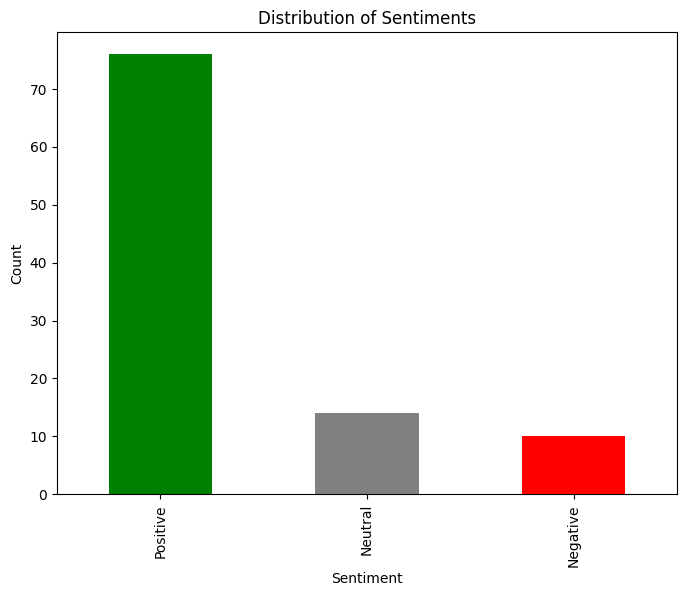

In [12]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = processed_customer_review_df['Sentiment'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Explicitly set ticks and labels with adjusted positions
ticks = [0, 1, 2]
labels = ['Positive', 'Neutral','Negative' ]
plt.xticks(ticks, labels)

plt.show()


<!-- BEGIN QUESTION -->

**Question 5:** What insight can you derive from this data?


From the regression and classification metrics, we can derive the following insights:

Regression Metrics:

- MAE (Mean Absolute Error): The average absolute difference between the predicted and actual sentiments is 0.1500.
- MSE (Mean Squared Error): The average squared difference between the predicted and actual sentiments is 0.1500.
- RMSE (Root Mean Squared Error): The square root of MSE is 0.3873, representing the average magnitude of the errors.
- R-squared: The model explains approximately 51.61% of the variance in the sentiment, indicating a moderate level of predictive performance.


 Classification Metrics:

- Accuracy: The model achieves an accuracy of 85%, indicating that 85% of sentiments are correctly classified.
- Precision: The precision score of 87.50% suggests that when the model predicts a sentiment, it is correct 87.50% of the time.
- Recall: The recall score of 85.00% indicates that the model captures 85.00% of the actual sentiments.
- F1-score: The F1-score, which considers both precision and recall, is 81.18%.
Overall Insights:

The sentiment analysis model, based on the chosen features and algorithm (Multinomial Naive Bayes), shows reasonable predictive performance.
The regression metrics indicate how well the model predicts the sentiment values numerically, while the classification metrics provide an assessment of the model's ability to correctly classify sentiments into positive, neutral, and negative categories.

<!-- END QUESTION -->

<!-- END QUESTION -->

